<a href="https://colab.research.google.com/github/JamileSantos/Modelos_Propagacao_Informacao/blob/master/SEIR_DET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

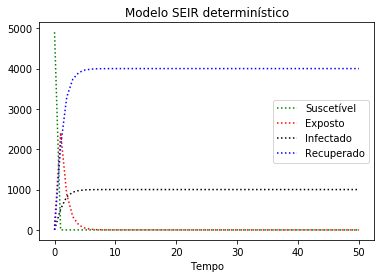

In [ ]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from sympy import *

N = 5000 # Tamanho total da população

# alfa, beta, gamma, sigma
beta = 0.2
alfa = 0.2
gamma = 1
sigma = 0


TS = 1.0 
ND = 50 #TempoFinal

# SEIR (Suscetível - Exposto - Infectado - Recuperado)

S0 = 4900 # População de S
E0 = 99   # População de E
I0 = 1    # População de I


INPUT = (S0, E0, I0, 0) # Entradas para o calculo da derivada


def diff_eqs(INPUT, t):
  
    Y = np.zeros(4)
    #V[0] - S, V[1] - E, V[2] - I e V[3] - R
    V = INPUT 
    
    # Equações diferenciais
    Y[0] = - alfa * V[0] * V[2] #- alfa * V[0] * V[1]
    Y[1] = alfa * V[0] * V[2] - gamma * V[1] #alfa * V[0] * V[1] - gamma * V[1]
    Y[2] = beta * gamma * V[1] - sigma * V[2] #beta * alfa * V[1] - sigma * V[2]
    Y[3] = (1- beta)* gamma * V[1] + sigma * V[2] #(1- beta)* gamma * V[1] + sigma * V[2]
    
    return Y   # For odeint

#diff(f(x),x);  
  
t_start = 0; #Tempo Inicial

t_end = ND; #Tempo Final

t_inc = TS # Incremento

t_range = np.arange(t_start, t_end + t_inc, t_inc) # Intervalo de Tempo

RES = spi.odeint(diff_eqs, INPUT, t_range) # Calculo das derivadas


#Gráfico
pl.plot(RES[:,0], ':g') #pl.plot(RES[0,:]*N, ':g')
pl.plot(RES[:,1], ':r') #pl.plot(RES[1,:]*N, ':r')
pl.plot(RES[:,2], ':k')  #pl.plot(RES[2,:]*N, ':k')
pl.plot(RES[:,3], ':b')  #pl.plot(RES[3,:]*N, ':b')

pl.legend(['Suscetível', u'Exposto', 'Infectado', 'Recuperado']);
pl.title('Modelo SEIR determinístico')
pl.xlabel('Tempo')
pl.savefig('sirpy')



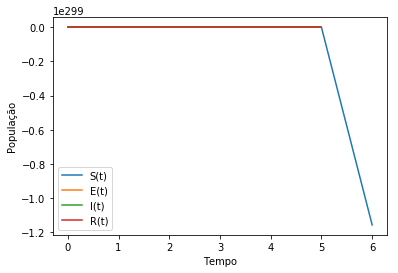

In [ ]:
import matplotlib.pylab as plt
from sympy import *

N = 5000
S = 4990
E = 99
I = 1
R = 0

# alfa, beta, gamma, sigma
beta = 0.2
alfa = 0.2
gamma = 1
sigma = 0

sus = []
inf = []
exp = []
rec = []

def infection(S, I, E, R):
    for t in range (1, 150):
        S = - alfa * S * I
        E =  alfa * S * I - gamma * E
        I =  beta * gamma * E - sigma * I
        R = (1- beta)* gamma * E + sigma * I

        sus.append(S)
        exp.append(E)
        inf.append(I)
        rec.append(R)
        

infection(S, I, E, R)


figure = plt.figure()
figure.canvas.set_window_title('SIR model')

sus_line, = plt.plot(sus, label='S(t)')
exp_line, = plt.plot(exp, label='E(t)')
inf_line, = plt.plot(inf, label='I(t)')
rec_line, = plt.plot(rec, label='R(t)')

plt.legend(handles=[sus_line, exp_line, inf_line, rec_line])

plt.ticklabel_format(style='sci', axis='y')

plt.xlabel('Tempo')
plt.ylabel('População')


plt.show()